# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 11 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Benjamin Daniel Poole </font>

# I. Introduction

The goal of this assignment is to classify the appliance energy usage of a home as low or high usage. The low and high usage classes are determined by the following: appliances energy usage in a home is greater than 60 Wh (high) or the appliance energy usage is less than or equal to 60 Wh (low). I want to utilize the features to see if I can correctly predict these two classes. Further details about the data and classes is located in section 2. Section 3 contains details about the four different functions I will use for classification. Section 4 contains information regarding my experimental results. Lastly, section 5 contains my concluding thoughts.

# II. Data

### Classification: Appliances Energy Dataset 

The goal of this data set is to predict whether appliance energy usage in a home is greater than 60 Wh or is less than or equal to 60 Wh. The postive class will be applicane energy usage that is less than or equal to 60 Wh while the negative class will be energy usuage greater than 60 Wh. This dataset contains 19735 samples with 25 base features (27 including random variable features) relating to the temperature/humidity of different rooms, outside weather factors and the energy use of light fixtures in the house (see features). Every row corresponds to 10 mins of data gathered over 4.5 months for a single house in Belgium.

 #### Features
- Appliances, energy use in Wh **TARGET above 60Wh(0,-1,[1,0]) or at/below 60Wh(1, [0,1])**
- lights, energy use of light fixtures in the house in Wh <br>
- T1, Temperature in kitchen area, in Celsius <br>
- RH_1, Humidity in kitchen area, in % <br>
- T2, Temperature in living room area, in Celsius <br>
- RH_2, Humidity in living room area, in % <br>
- T3, Temperature in laundry room area <br>
- RH_3, Humidity in laundry room area, in %<br> 
- T4, Temperature in office room, in Celsius <br>
- RH_4, Humidity in office room, in % <br>
- T5, Temperature in bathroom, in Celsius <br>
- RH_5, Humidity in bathroom, in % <br>
- T6, Temperature outside the building (north side), in Celsius<br> 
- RH_6, Humidity outside the building (north side), in % <br>
- T7, Temperature in ironing room , in Celsius <br>
- RH_7, Humidity in ironing room, in % <br>
- T8, Temperature in teenager room 2, in Celsius <br>
- RH_8, Humidity in teenager room 2, in % <br>
- T9, Temperature in parents room, in Celsius <br>
- RH_9, Humidity in parents room, in % <br>
- To, Temperature outside (from Chievres weather station), in Celsius <br>
- Pressure (from Chievres weather station), in mm Hg <br>
- RH_out, Humidity outside (from Chievres weather station), in % <br>
- Wind speed (from Chievres weather station), in m/s <br>
- Visibility (from Chievres weather station), in km <br>
- Tdewpoint (from Chievres weather station), Â°C <br>

[Data Link](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 ### Preprocessing
 Since my data is built for linear regression I must manually create my target based on the rules stated above. Once I have my target I will have to create multiple ways of representing said target, since each algorithm takes a different target structure. It is also important to note that I will be randomizing all my data based on a random seed.

In [40]:
# Preprocessing
df_class = pd.read_csv("class_data.csv")
raw_target = df_class['Appliances'] # raw target (hasnt been converted to binary target)
df_class= df_class.drop(['date', 'rv1', 'rv2'],1) 
df_data = df_class.drop('Appliances',1) # drop the actual appliance energy usuage
data = df_data.values # Dataset

# Randomize Data
rng_prem = np.random.RandomState(seed=42).permutation(len(data))
data = data[rng_prem]
raw_target = raw_target[rng_prem].values

# Create binary target based on raw_target
target = np.ones(raw_target.shape, dtype=int)
for idx in range(len(raw_target)):
    if raw_target[idx] > 60:
        target[idx] = 0 # set to zero for now, so we can one-hot encode later

# Create a one-hot target
target_hot = np.zeros((len(target), 2), dtype=int)
target_hot = np.eye(2)[target]

# Create target with values -1 and 1
target_neg = np.ones(raw_target.shape, dtype=int)
target_neg[target==0] = -1 # set to -1

print("Target", target) 
print("Target with negative", target_neg) # above 60 0/-1, at or below 60 1
print("Target one-hot", target_hot) # above 60 [1,0], at or below 60 [0,1]

# Partition data
partition = int(len(data) * .8)

# Train
train_data = data[:partition]
train_target = target[:partition]
train_target_neg = target_neg[:partition]
train_target_hot = target_hot[:partition]

# Test
test_data =  data[partition:]
test_target = target[partition:]
test_target_neg = target_neg[partition:]
test_target_hot = target_hot[partition:]


Target [1 0 1 ... 1 0 0]
Target with negative [ 1 -1  1 ...  1 -1 -1]
Target one-hot [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [41]:
df_class

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
5              50      40  19.890000  46.026667  19.200000  44.500000   
6              60      50  19.890000  45.766667  19.200000  44.500000   
7              60      50  19.856667  45.560000  19.200000  44.500000   
8              60      40  19.790000  45.597500  19.200000  44.433333   
9              70      40  19.856667  46.090000  19.230000  44.400000   
10            230      70  19.926667  45.863333  19.356667  44.400000   
11            580      60  20.066667  46.396667  19.426667  44.400000   
12            430      50  20.133333  48.000000  19.566667  44.400000   
13            250      40  20.260000  52.726667  19.730000  45.100000   
14            100      10  20.426667  55.893333  19.856667  45.833333   
15            100      10  20.566667  53.893333  20.033333  46.756667   
16             90      10  20.730000  52.660000  20.166667  47.223333   
17             70      30  20.856667  53.660000  20.200000  47.056667   
18             80      30  20.890000  51.193333  20.200000  46.330000   
19            140      40  20.890000  49.800000  20.200000  46.026667   
20            120      20  20.890000  48.433333  20.200000  45.722500   
21            190      40  20.963333  47.633333  20.260000  45.530000   
22            110      40  21.033333  47.063333  20.290000  45.223333   
23            110      40  21.100000  46.596667  20.356667  44.963333   
24            110      30  21.133333  46.060000  20.426667  44.760000   
25            110      20  21.200000  45.800000  20.500000  44.760000   
26            100      30  21.290000  45.900000  20.533333  45.090000   
27            100      20  21.356667  45.826667  20.666667  45.163333   
28            100      20  21.390000  45.690000  20.700000  45.060000   
29            100      20  21.500000  45.333333  20.700000  44.933333   
...           ...     ...        ...        ...        ...        ...   
19705         280       0  25.033333  48.363333  26.528571  40.595714   
19706         240       0  25.166667  48.156667  26.600000  40.940000   
19707         250       0  25.323333  47.930000  26.600000  41.012857   
19708         220       0  25.390000  47.656667  26.600000  41.036000   
19709         230       0  25.500000  47.133333  26.600000  41.000000   
19710         190      10  25.500000  47.060000  26.540000  41.000000   
19711         160       0  25.600000  46.990000  26.512500  41.203750   
19712          80       0  25.600000  46.730000  26.437143  41.384286   
19713          60       0  25.566667  46.633333  26.370000  41.378000   
19714          60       0  25.500000  46.360000  26.318571  41.264286   
19715          60       0  25.500000  46.060000  26.350000  41.000000   
19716          60       0  25.500000  45.933333  26.277143  41.000000   
19717          70       0  25.500000  45.760000  26.200000  41.000000   
19718          80       0  25.500000  45.626667  26.171429  41.000000   
19719          80       0  25.500000  45.590000  26.100000  41.000000   
19720          70       0  25.500000  45.522500  26.100000  41.051429   
19721         100       0  25.500000  45.633333  26.080000  41.196000   
19722         100       0  25.500000  45.730000  26.000000  41.428571   
19723          90       0  25.500000  45.790000  26.000000  41.590000   
19724         100       0  25.500000  45.933333  26.000000  41.652857   
19725         220       0  25.426667  46.060000  26.000000  41.700000   
19726         180       0  25.500000  46.530000  26.000000  41.725714   
19727         120       0  25.500000  47.456667  26.000000  42.32

### Visualization

**Appliances Energy Usuage**:Below we can see how many times each Wh value occurred over the 4.5 months. As we can see 50 and 60 Wh occured the most and can assume our mean appliance usuage should be around 50-60 Wh.

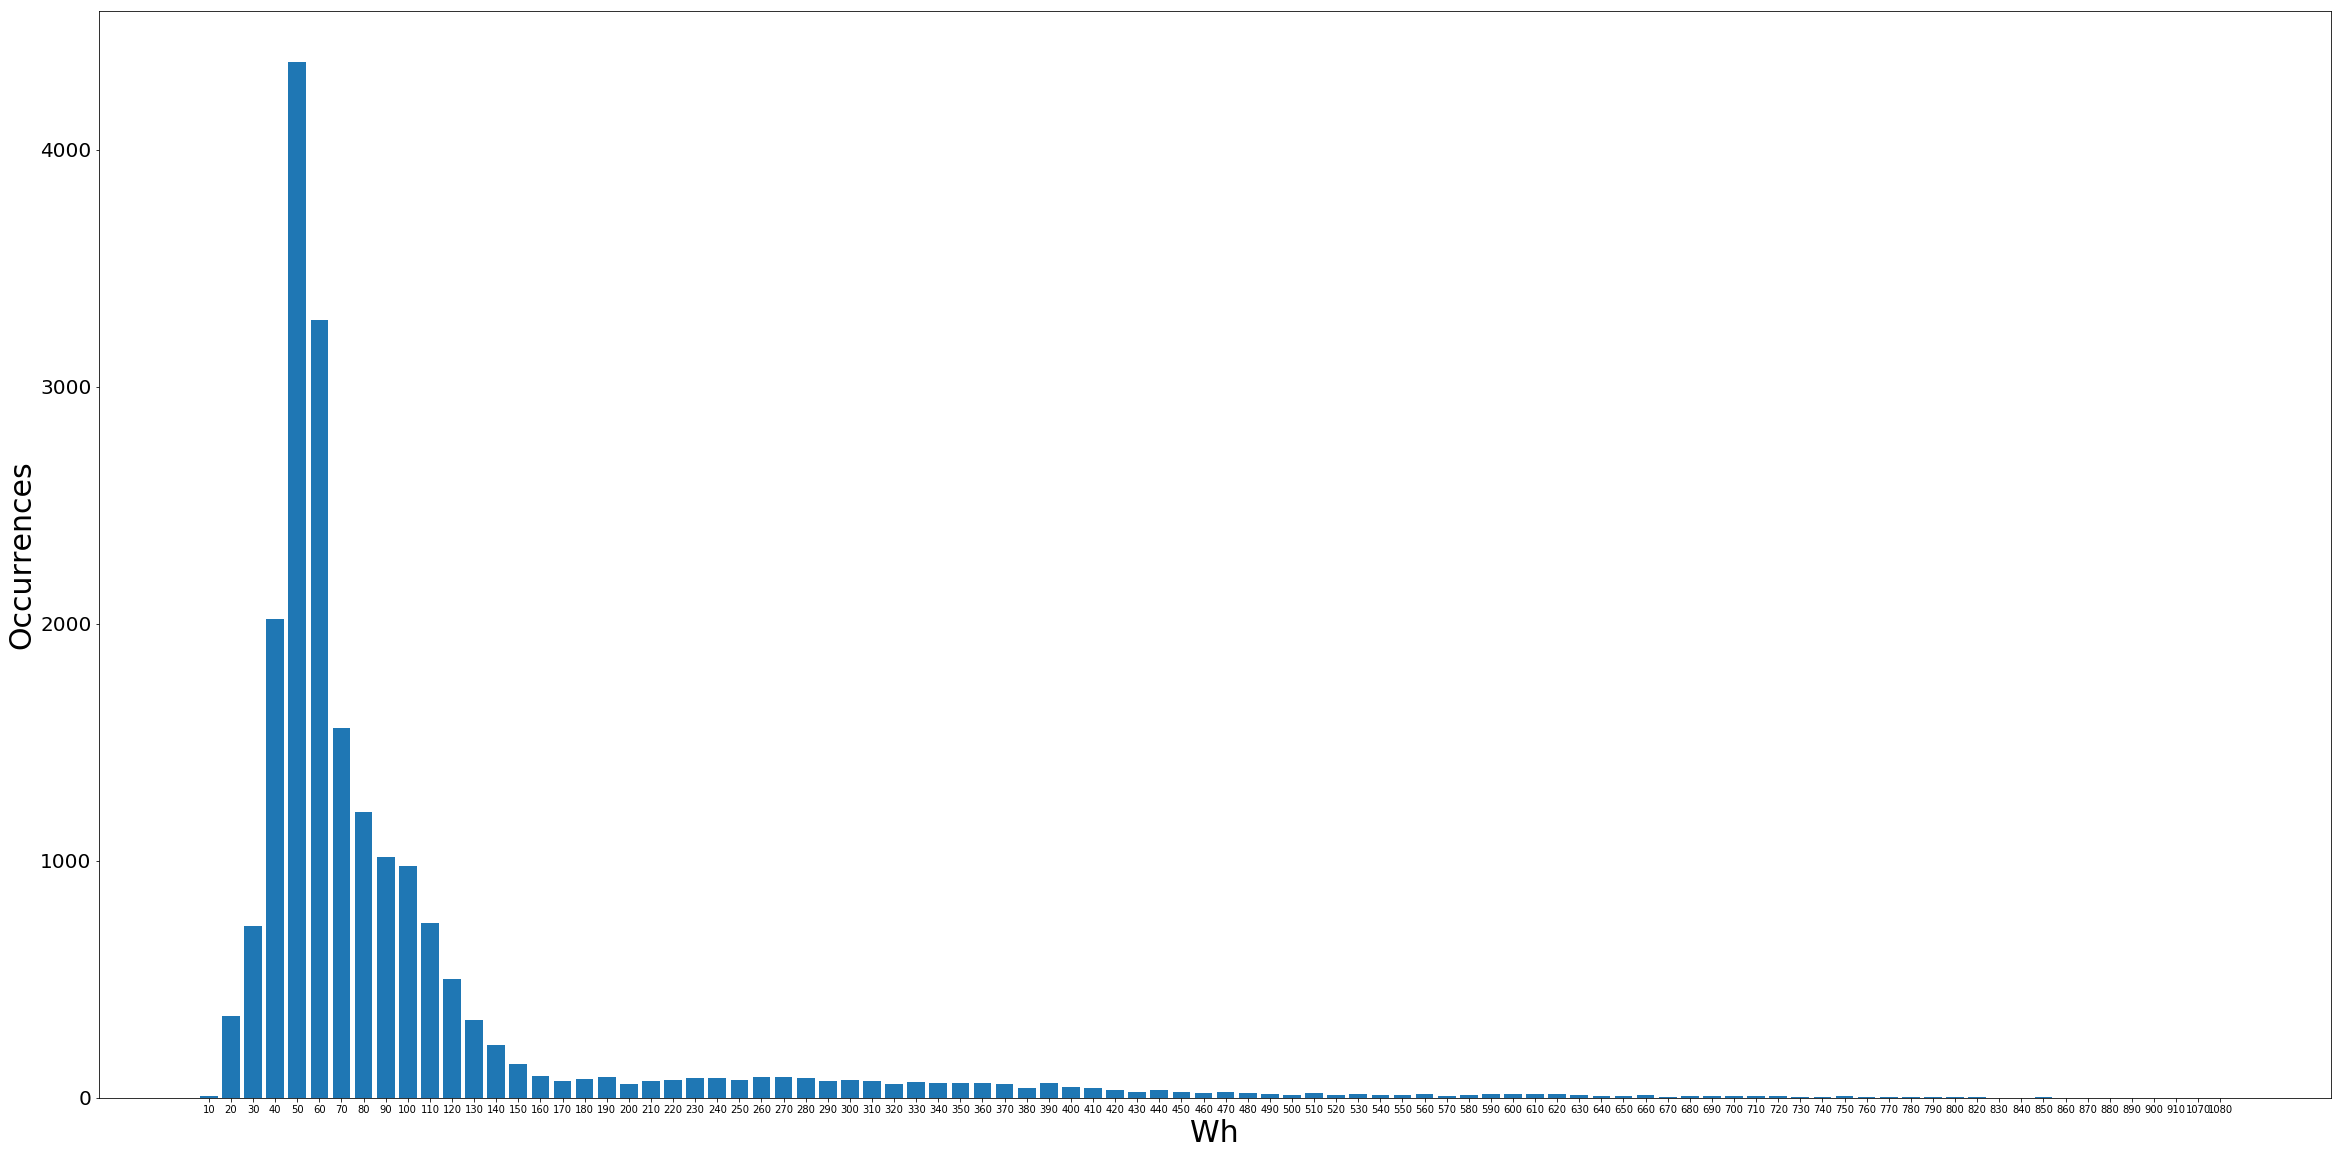

In [44]:
app = df_class.iloc[:,0].values
count = np.unique(app, return_counts=True)
fig, ax = plt.subplots(1,1, figsize=(40,20))
ax.bar(range(0, 92),count[1], tick_label =count[0])
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel("Wh",  fontsize=30)
ax.set_ylabel("Occurrences", fontsize=30)
plt.show()

As you can see here, this is my class split. This is a much easier to understand version of the graph above and follows the previously mentioned target rule guidelines (appliances energy usage in a home greater than 60 Wh is the negative class and the appliance energy usage less than or equal to 60 Wh is positive class). My data isn’t completely balanced seen as my positive class has slightly more values, around 11k samples. This means that my negative class has slightly less samples, around 9k.

Energy 60 and Below (1, [0,1]): 10744
Energy Above 60 (0,-1,[1,0]): 8991


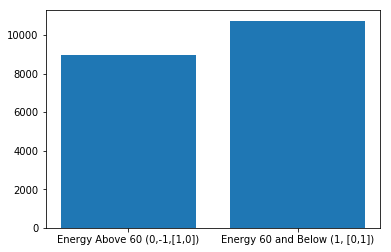

In [12]:
positive = np.where(target==1)[0]
negative = np.where(target==0)[0]
y = [len(negative), len(positive)]
x = np.arange(2)

print("Energy 60 and Below (1, [0,1]):",  len(positive))
print("Energy Above 60 (0,-1,[1,0]):", len(negative))

plt.bar(x,y)
plt.xticks(x, ("Energy Above 60 (0,-1,[1,0])", "Energy 60 and Below (1, [0,1])"))
plt.show()


**Room Temperatures** Here we can see a linear trend in the increase in temperature over time in all rooms of the house. This is most likely due to increase in temperature outside over the 4.5 months. Meaning, that the tests began in April and lasted around five months, therefore ending around August/September, in other words the end of summer (summer tends to end around the end of September in Belgium).

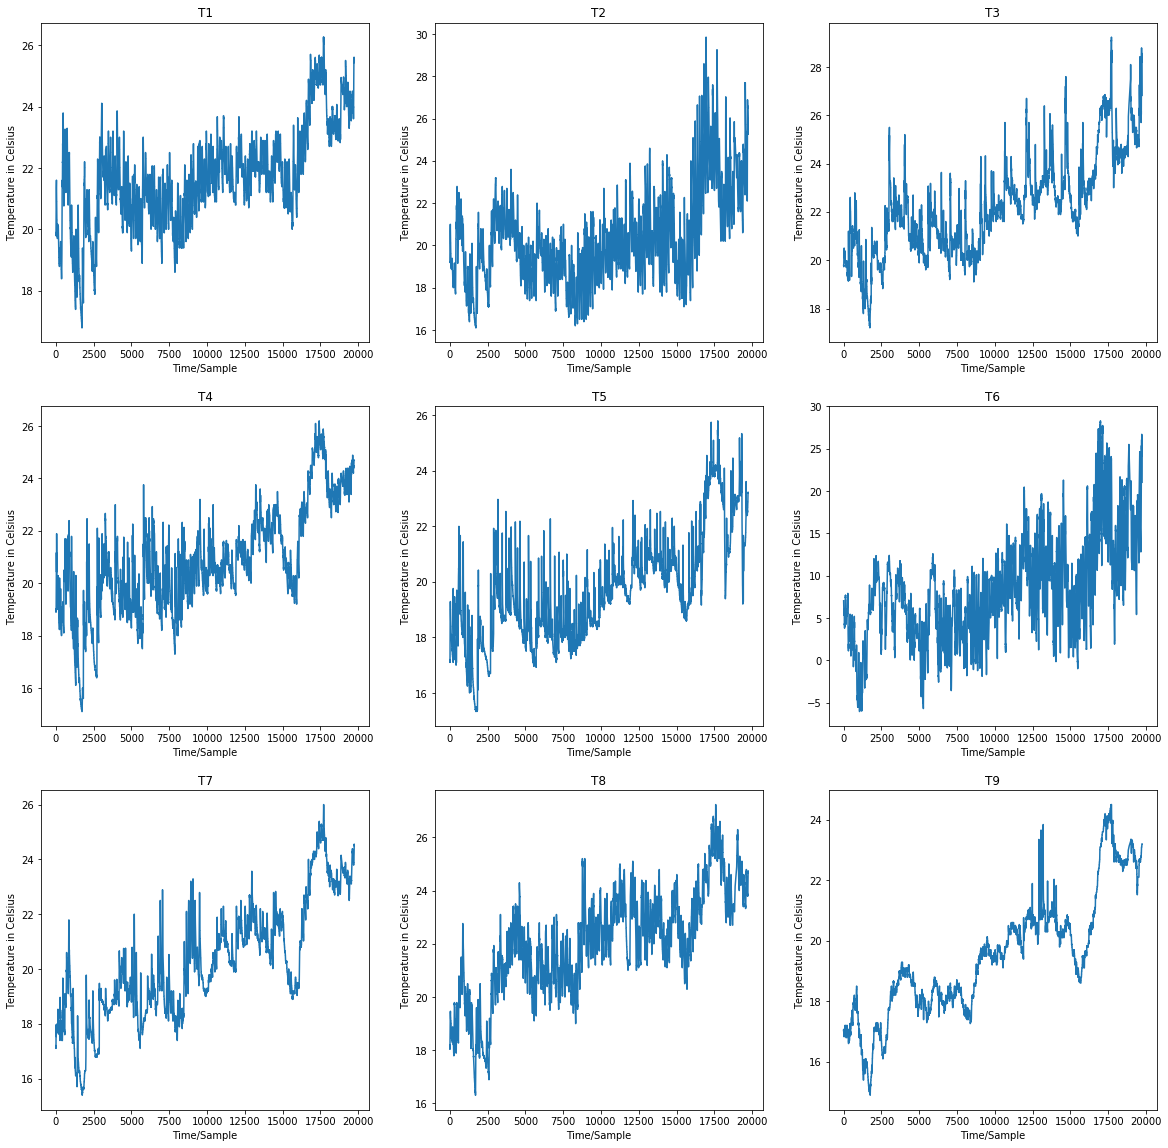

In [45]:
ax = []
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flatten()
for i in range(len(ax)):
    loc = "T" + str(i+1)
    ax[i].plot(df_class.loc[:,loc])
    ax[i].set_title('T' + str(i+1))
    ax[i].set_xlabel("Time/Sample")
    ax[i].set_ylabel("Temperature in Celsius")
plt.show()

**Room Humidity** Here it is much harder to tell if there is a trend. If we take a carful look we can see a negative to neutral trend in humidity over time in almost all the rooms. As summer comes to an end the humidity in the rooms decreases depending on the rooms location. The room with the most neutral trend is the bathroom or RH_5. While the location with the most apparent negative trend is outside or RH_6.

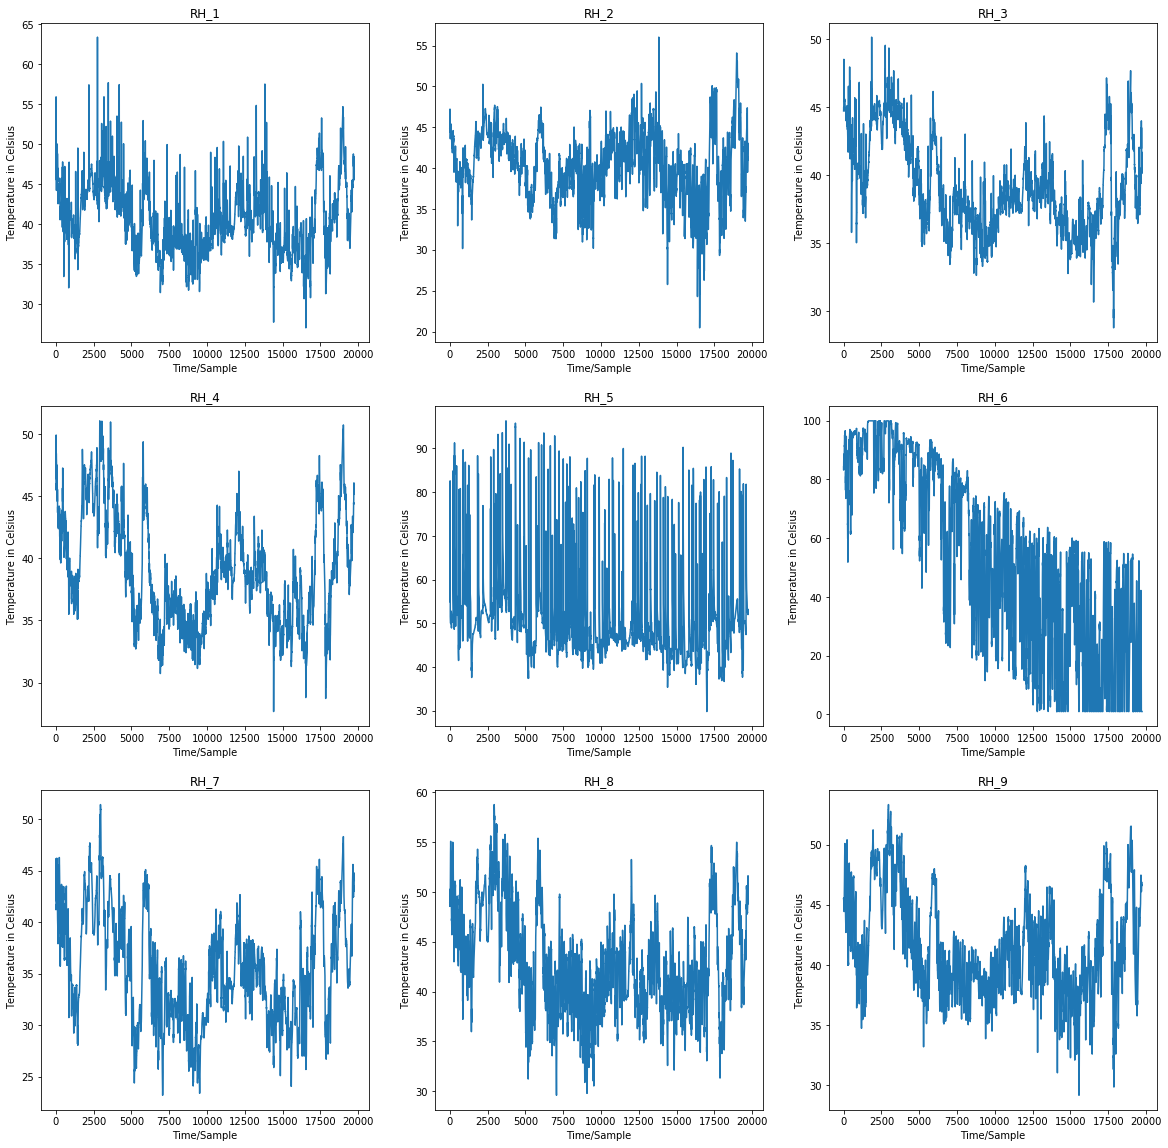

In [19]:
ax = []
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flatten()
for i in range(len(ax)):
    loc = "RH_" + str(i+1)
    ax[i].plot(df_class.loc[:,loc])
    ax[i].set_title('RH_' + str(i+1))
    ax[i].set_xlabel("Time/Sample")
    ax[i].set_ylabel("Temperature in Celsius")
plt.show()

### Preliminary Observations Summary

As you can see from the above observations, my data seems to be following linear trends. Depending on the feature the linear trends may be strong or weak and positively or negatively related. We can also see that the average value of the energy usage should be around 50-60 Wh. Lastly, it is important to note that my data has a slight imbalance with the positive class having around 2000 more samples than the negative class. I do not expect this to greatly affect my classification results though.

# III. Method


### A. Super Classs Definition

Here we have our super and abstract classes. The super class (BaseModel) contains our empty train and use methods. Our abstract class (Classifier) then inherits the super class, implementing a few new functions but leaving the train and use methods empty. The abstract class adds some new methods check_matrix, normalize and add_ones. The check_matrix method simply checks to make sure the matrix being passed is 2D and returns true or false. The add_ones method simply adds the column of ones, severing as bias, to the passed matrix and then returns it. Lastly, the normalize function normalizes the passed data around a 0 mean. <br>

#### Classification Summary
As I noted earlier in the notebook I will be using four classification methods, described later. But what is classification? Classification is simply classifying data samples as A or B, in the binary case. Classification is not trying to predict a continuous value but rather a discreet one.

In [22]:
import numpy as np
import abc
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

The pocket algorithm works by utilizing the perceptron algorithm. The perceptron algorithm works by making a prediction on a single data sample and updating the weights if the sample is misclassified. These weight updates are done by multiplying the target(1, -1) by the data sample and the learning rate. What is unique about the pocket algorithm is that it maintains the best weights, the weights that create the best predictions. The best weights are then used in the use() function to give you the best predictions for your test data. Pocket predictions simply give you the class that each data sample falls under, it doesn't give you any information about the probabiltiy of belonging to said class.

In [23]:
from copy import deepcopy as copy 

class Pocket(Classifier):

    def compare(self, X, T):
        y = np.sign(X @ self.w) # MxN @ N,= M,
        yp = np.sign(X @ self.w_pocket) # MxN @ N,= M,

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    def train(self, X, T, alpha=.01, maxiter=1000, norm=True):
        self.w = np.random.rand(X.shape[1]) # N,
        self.w_pocket = copy(self.w) # N,
        train_acc = [] # track training accuracy
        if norm: X =self.normalize(X) # Norm data
            
        for _iter in range(maxiter):
            converged = True
            tmp_acc = 0
            
            for i in np.random.permutation(len(X)): # randomly select samples TODO: Change if need be for data
                y = self.w @ X[i] # N, @ N, = scalar 
                if np.sign(y) != np.sign(T[i]):
                    tmp_acc += 0
                    self.w += alpha * T[i] * X[i] # 1, * N, = N,
                    converged = False
                    if self.compare(X, T) > 0:
                        self.w_pocket[:] = self.w[:]
                else: tmp_acc += 1
                    
            train_acc.append(tmp_acc/len(X))
            if converged:
                print("Converged at:", _iter)
                return train_acc
            
        print("End of training: ", _iter)
        return train_acc
    
    def use(self, X):
        X = self.normalize(X)
        Y = X @ self.w_pocket # MxN @ N,= M

        return Y

### C. QDA

The QDA algorithm works by utlizing the Bayes formula and making a gausian assumption for the condiational probability. If we take the derivative of this Baysian formula with a guasian assumption we get the follwoing discriminative function. <br>

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

The variables needed for this discrimative function are the mean(mu), covariance(sigma) and priors(P(T=k)) for all the classes that are trying to be classified. Once you have these variables you can calcuate the guess for each data sample  (train finds the variables, test uses these variables on new data). Then you simply take the argmax of the delta function to get the class prediction. <br>

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

The decsion boundry is then placed where the class delta functions meet.

In [46]:
class QDA(Classifier):
    def __init__(self):
        self.mu = [] # init list for each class
        self.sig = [] # init list for each class
        self.prior = [] # init list for each class
    
    
    def discrim(self, X, mu, sig, prior):
        sig_inv = np.linalg.inv(sig)
        det_sig = np.linalg.det(sig)
        diff = X - mu
        sum_diff = np.sum(diff @ sig_inv * diff, axis=1)
        
        qda = -.5 * np.log(det_sig) - .5 * sum_diff + np.log(prior)
        
        return qda
    
    def train(self, X, T, norm=True):
        self.classes = np.unique(T)
        X =self.normalize(X)
        for i in self.classes: # get unqiue classes
            truth = (T == i).reshape(-1)
            self.mu.append(np.mean(X[truth], 0)) # compute mean for each feature
            self.sig.append(np.cov(X[truth].T)) # compute covariance matrix
            self.prior.append(len(X[truth]) / len(X)) # compute prior (# of samples per class / total samples)
        return self.mu
            
    def use(self, X):
        qda = []
        X =self.normalize(X)
        for i in range(len(self.classes)): # apply qda to each classes metrics
            qda.append(self.discrim(X, self.mu[i], self.sig[i], self.prior[i]))
        Y = np.argmax(qda, 0) # take max (column wise) to determine which class qda predicted
        return  Y 

### D. LDA

LDA works almost exactly like QDA but with a very important change. QDA's main weakness is that it is very expensive to calcualte the covariance matricies for each class. LDA trys to fix this by simply finding the covariance matrix for the entire dataset (or the mean of convariances for the data) and then using this universal covariance for each class. Below is the discrimenation function that was used in QDA. <br>

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma \vert - \frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma^{-1} (x - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma^{-1} (x - \boldsymbol\mu_-) + \ln P(T = -1)
$$

Now, since we have a universal covariance we can cancel out the quadratic terms and simplify the equation to the below equation.

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

Lastly, you find the mu's and priors for each class and then run them and your universal covariance matrix through this delta function to find your class probabilities. Just like QDA, we take the argmax to find our class prediction.

In [25]:
class LDA(Classifier):
    
    def __init__(self):
        self.mu = [] # init list for each class
        self.sig = None # init fixed sigma
        self.prior = [] # init list for each class

    def discrim(self, X, mu, sig, prior):
        sig_inv = np.linalg.inv(sig)
        dot_X = np.dot(X, sig_inv)
        dot_mu = np.dot(mu, sig_inv)
        lda = np.sum(dot_X * mu - .5 * dot_mu * mu + np.log(prior), axis=1)
        
        return lda
    
    def train(self, X, T):
        self.classes = np.unique(T)
        X = self.normalize(X)
        self.sig = np.cov(X.T) # compute fixed covariance
        for i in self.classes: # get unqiue classes
            truth = (T == i).reshape(-1)
            self.mu.append(np.mean(X[truth], 0)) # compute mean for each feature
            self.prior.append(len(X[truth]) / len(X)) # compute prior (# of samples per class / total samples)
        return self.mu
            
    def use(self, X):
        lda = []
        X = self.normalize(X)
        for i in range(len(self.classes)): # apply qda to each classes metrics
            lda.append(self.discrim(X, self.mu[i], self.sig, self.prior[i]))
        Y = np.argmax(lda, 0) # take max (column wise) to determine which class qda predicted
        return  Y 

### E. Logistic Regression

Logistic regression works in a similar fashion to linear regression but now we are trying to predict P(T=k | x). Our weight updates are relatively similar to linear regression's and works by applying the gradient to MSE with respect to ***w***. This would normally turn into the same weight update as in LMS but there is an important difference between the two functions. This difference is that logistic regression applies a softmax (sigmoid function) its predictions(w.T @ X), which slightly alters the derivation. Below we can see the difference between the two weight update functions for LMS and logistic regression after taking their derivatives.

$$
w \leftarrow w - \alpha \nabla_w E(w).
$$

**LMS**<br>
$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

**Logistic with sigmoid** <br>

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$

Using this update we can find the probability that a sample belongs to a class. Just like QDA/LDA we can take the argmax of these probabilistic predictions to find the class prediction.

In [38]:
class Logistic_Reg(Classifier):
    
    def softmax(self, X):
        z = X @ self.w 
        #print(z)
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def train(self, X, T, alpha=.00001, maxiter=1000): # Needs indicator variable
        X = self.normalize(X)
        X1 = self.add_ones(X)
        self.w = np.zeros((X1.shape[1], T.shape[1])) # D+1xK (D+1 = M)
        train_acc = []
        
        for i in range(maxiter):
            ys = self.softmax(X1)
            self.w += alpha * X1.T @ (T - ys) # NxM @ Mx2 = Nx2 prob for each class
            train_acc.append(len(T[np.argmax(T, 1) == np.argmax(self.softmax(X1), 1)]) / len(T))
        return train_acc
            
    def use(self, X):
        X = self.normalize(X)
        X1 = self.add_ones(X)
        Y_raw = self.softmax(X1)
        Y = np.argmax(Y_raw, 1)
        return Y
        
        

# IV. Experiments

## Evaluation Metric

My evaluation metric will be of the accuracy and the utilization of a confusion matrix. The overall accuracy should be the best indicator for how well my algorithms are preforming. This is because my data is pretty basic with nothing special or particular about it (no massive imbalance of data).  For further detail I can visualize the confusion matrix to find out exactly how many predictions are correct and wrong. The code below is code from a notes file for creating a dataframe that contains the TN, FN, FP and TP. <br>

### Visualization

I will have 5 graphs for each algorithm. There will be 1 unique graph that changes depending on which algorithm is being used (train scores or mean distribution). Then, there will 4 constant graphs that each algorithm will use (class distribution line, class distribution bar, confusion matrix and confusion matrix bar).

In [58]:
def confusion_matrix(Y, T):
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    confusion = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        confusion.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return confusion

# Confusion Matrix Display
def display_conf(pred, target):
    cof = confusion_matrix(pred, target).values
    y = [cof[0,0], cof[0,1], cof[1,0], cof[1,1]]
    x = np.arange(4)
    metrics = ["TN", "FN", "FP", "TP"]

    plt.bar(x,y)
    plt.xticks(x, metrics)
    plt.title("Confusion Matrix Distribution")
    plt.ylabel("Number of predictions")
    plt.show()
    
    
def display_classes(pred, c=[0,1]):
    y = [len(pred[pred==c[0]]), len(pred[pred==c[1]])]
    x = np.arange(2)
    classes = ["Negative", "Positive"]

    plt.bar(x,y)
    plt.xticks(x, classes)
    plt.title("Class Distribution")
    plt.ylabel("Number of predictions")
    plt.show()

## Pocket

In [48]:
pocket = Pocket()
print("Train Data Shape", train_data.shape, "Train Target shape", train_target_neg.shape)
print("Test Data Shape", test_data.shape, "Test Target shape", test_target_neg.shape)

pock_train_acc = pocket.train(train_data, train_target_neg, alpha=.1, maxiter=50, norm=True)
y_raw_pock = pocket.use(test_data).reshape(-1,1)
print("Prediction Shape:", y_raw_pock.shape)

Train Data Shape (15788, 25) Train Target shape (15788,)
Test Data Shape (3947, 25) Test Target shape (3947,)
End of training:  49
Prediction Shape: (3947, 1)


 As we can see here we get a relatively average score of around ~77% with a plus or minus 6%. It seems that the pocket algorthim seems to missclassify both positive and the negative class at the same rate. As seen in the confusion matrix both the false negative and false positive predictions are around the same value. Lastly, we can also see I had a much lower mean training score on the last iteration of the maxiter training, ~10% lower.

In [49]:
# Total predictions for each class
y_pos_pock = np.where(y_raw_pock > 0)[0]
print("Postive Class Predictions:", len(y_pos_pock))
y_neg_pock = np.where(y_raw_pock < 0)[0]
print("Negative Class Predictions:", len(y_neg_pock))

# Accuracy
Y_pock = np.ones(test_target_neg.shape)
for i in range(len(y_neg_pock)):
    Y_pock[y_neg_pock[i]] = -1
pock_test_acc = round(np.sum(test_target_neg == Y_pock) / len(test_target_neg), 2)
print("Last Train Mean Accuracy:", pock_train_acc[-1])
print("Test Accuracy:", pock_test_acc)

Postive Class Predictions: 2166
Negative Class Predictions: 1781
Last Train Mean Accuracy: 0.6710793007347352
Test Accuracy: 0.77


Here we can see the sporadic results of my train accuracies.

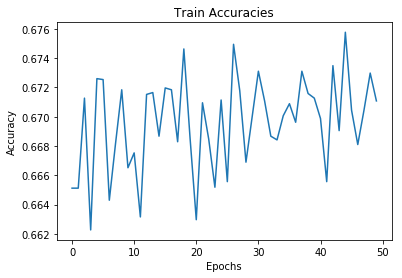

In [59]:
# Train accuracies 
plt.plot(pock_train_acc)
plt.title("Train Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Here we can see the distribution of my predictions. With normalization most of the prediciton values seem to be clustered around a 0 mean. We can also better understand the distribution of the class prediction in the remaining graphs.

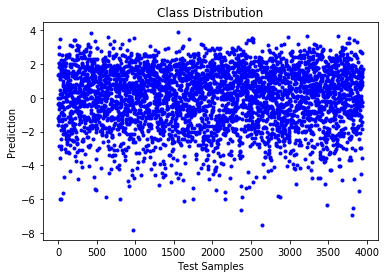

In [60]:
# Negative vs Positive
plt.plot(y_raw_pock,'.b')
plt.title("Class Distribution")
plt.xlabel("Test Samples")
plt.ylabel("Prediction")
plt.show()

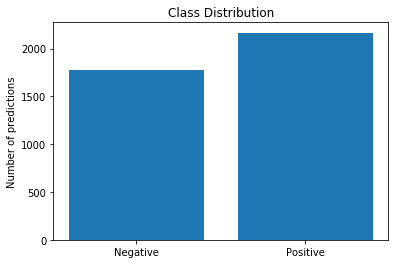

In [62]:
# Negative vs Positive
display_classes(Y_pock, c=[-1,1])

In [63]:
# Dataframe Conf Matrix
confusion_matrix(Y_pock, test_target_neg)

-1     1
-1  1320   461
 1   466  1700

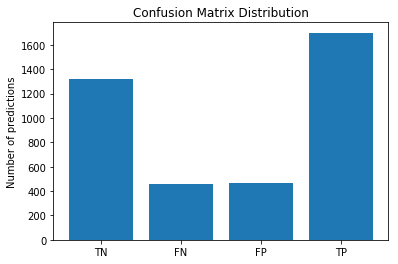

In [64]:
display_conf(Y_pock, test_target_neg)

## QDA

In [37]:
qda = QDA()
print("Train Data Shape", train_data.shape, "Train Target shape", train_target.shape)
print("Test Data Shape", test_data.shape, "Test Target shape", test_target.shape)

qda_mu = qda.train(train_data, train_target)

y_raw_qda = qda.use(test_data)
print("Prediction Shape:", y_raw_qda.shape)

Train Data Shape (15788, 25) Train Target shape (15788,)
Test Data Shape (3947, 25) Test Target shape (3947,)
(3947,)
Prediction Shape: (3947,)


As we can see for the QDA results I get another relatively average score of ~79% accuracy. Once again, the missclassifcation of the positive and negative classes are relatively close together with a tilt towards predicting more false positives than false negatives.

In [65]:
y_pos_qda = np.where(y_raw_qda == 1 )[0]
print("Positive Class Predictions:", len(y_pos_qda))
y_neg_qda = np.where(y_raw_qda == 0)[0]
print("Negative Class Predictions:", len(y_neg_qda))

# Accuracy
qda_acc = round(np.sum(test_target == y_raw_qda) / len(test_target), 2)
print("Accuracy:", qda_acc)


Positive Class Predictions: 2369
Negative Class Predictions: 1578
Accuracy: 0.79


Since QDA lacks training scores, here we can observe the means for each feature for each class (positive/negative). 

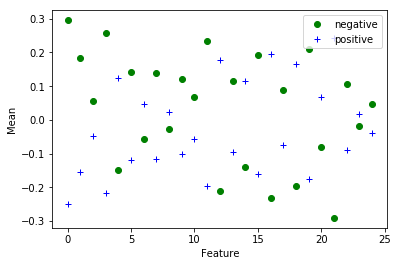

In [101]:
# Means for each feature based on class 
plt.plot(qda_mu[0], "og",label="negative")
plt.plot(qda_mu[1], "+b",label="positive")
plt.legend()
plt.ylabel("Mean")
plt.xlabel("Feature")
plt.show()

Here is the distribution of the predictions. This graph makes is quite hard to tell what the actuall distribution is. We can gain a better understanding of the distribution of the class predictions in the remaining graphs.

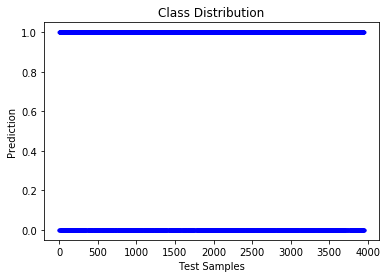

In [70]:
# Negative vs Positive
plt.plot(y_raw_qda,'.b')
plt.title("Class Distribution")
plt.xlabel("Test Samples")
plt.ylabel("Prediction")
plt.show()

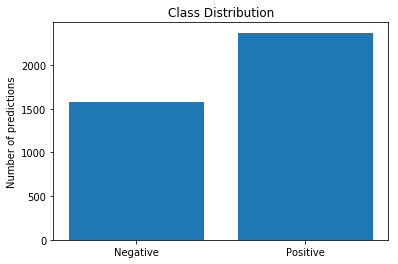

In [69]:
# Negative vs Positive
display_classes(y_raw_qda)

In [71]:
# Confusion Matrix
confusion_matrix(y_raw_qda, test_target)

0     1
0  1272   306
1   514  1855

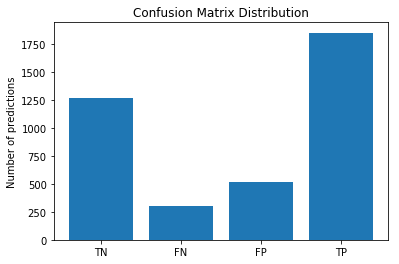

In [72]:
# Visualization of confusion matrix
display_conf(y_raw_qda, test_target)

## LDA

In [74]:
lda = LDA()
print("Train Data Shape", train_data.shape, "Train Target shape", train_target.shape)
print("Test Data Shape", test_data.shape, "Test Target shape", test_target.shape)

lda_mu = lda.train(train_data, train_target)
y_raw_lda = lda.use(test_data)
print("Prediction Shape:", y_raw_lda.shape)

Train Data Shape (15788, 25) Train Target shape (15788,)
Test Data Shape (3947, 25) Test Target shape (3947,)
Prediction Shape: (3947,)


As we can see from the LDA results we get relatively poor results. The LDA classifier seems to classify all data samples as the postive class (less than or equal to 60 Wh energy usuage). I believe this issue could be due to the universal convariance not generalizing well.

In [75]:
y_pos_lda = np.where(y_raw_lda == 1 )[0]
print("Positive Class Predictions:", len(y_pos_lda))
y_neg_lda = np.where(y_raw_lda == 0)[0]
print("Negative Class Predictions:", len(y_neg_lda))

# Accuracy
lda_acc = np.sum(test_target == y_raw_lda) / len(test_target)
print("Accuracy:", lda_acc)

Positive Class Predictions: 3946
Negative Class Predictions: 1
Accuracy: 0.5477577907271345


Since LDA lacks training scores, here we can observe the means for each feature for each class (positive/negative).

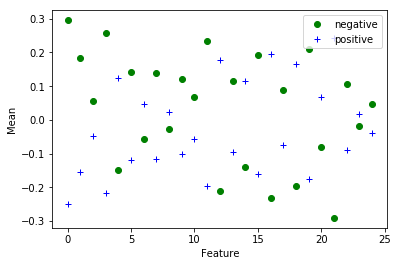

In [100]:
# Means for each feature based on class 
plt.plot(lda_mu[0], "og",label="negative")
plt.plot(lda_mu[1], "+b",label="positive")
plt.legend()
plt.ylabel("Mean")
plt.xlabel("Feature")
plt.show()

The below graphs we can see the distribution of the classes in multiple forms, heavily in favor of the positive class. We can also better understand the distribution of the class prediction in the remaining graphs.

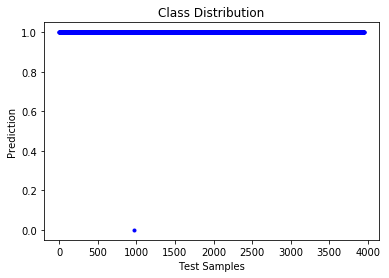

In [78]:
# Negative vs Positive
plt.plot(y_raw_lda,'.b')
plt.title("Class Distribution")
plt.xlabel("Test Samples")
plt.ylabel("Prediction")
plt.show()

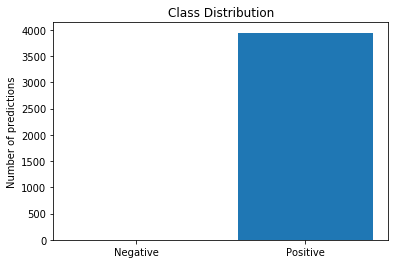

In [80]:
# Negative vs Positive
display_classes(y_raw_lda)

In [81]:
# Confusion Matrix
confusion_matrix(y_raw_lda, test_target)

0     1
0     1     0
1  1785  2161

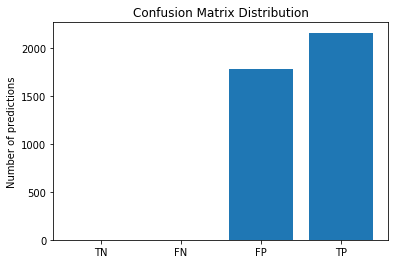

In [82]:
# Visualize confusion matrix
display_conf(y_raw_lda, test_target)

## Logistic Regression

In [93]:
log = Logistic_Reg()
print("Train Data Shape", train_data.shape, "Train Target shape", train_target_hot.shape)
print("Test Data Shape", test_data.shape, "Test Target shape", test_target_hot.shape)

log_train_acc = log.train(train_data, train_target_hot)
y_raw_log = log.use(test_data)
print("Prediction Shape:", y_raw_log.shape)

Train Data Shape (15788, 25) Train Target shape (15788, 2)
Test Data Shape (3947, 25) Test Target shape (3947, 2)
Prediction Shape: (3947,)


For logistic regression we can see the, once again, I had relatively average train and test scores, ~76. Also we can see that there is realatively the same amount of missclassification for both the positive and negative classes. This means that we have around the same number of false positive and false negative predictions.

In [94]:
y_pos_log = np.where(y_raw_log == 1 )[0]
print("Positive Class Predictions:", len(y_pos_log))
y_neg_log = np.where(y_raw_log == 0)[0]
print("Negative Class Predictions:", len(y_neg_log))

log_test_acc = np.sum(test_target == y_raw_log) / len(test_target)
print("End Train Accuracy:", log_train_acc[-1])
print("Test Accuracy:", log_test_acc)

Positive Class Predictions: 2205
Negative Class Predictions: 1742
End Train Accuracy: 0.7641246516341526
Test Accuracy: 0.7694451482138333


Here we can see my train accurices over n-epochs -  they seem to converage around the test acccuracy.

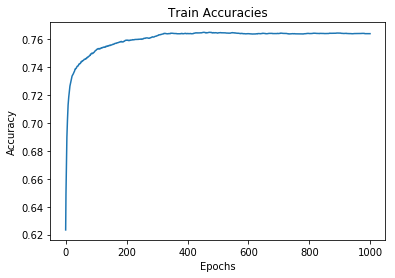

In [95]:
# Train accuracies 
plt.plot(log_train_acc)
plt.title("Train Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Here we can see the distribution of the data, which is relatively balanced as mentioned. We can gain a better understanding of the distribution of the class predictions in the remaining graphs.

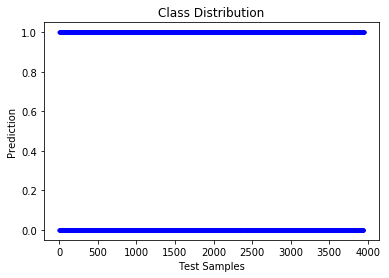

In [96]:
# Negative vs Positive
plt.plot(y_raw_log,'.b')
plt.title("Class Distribution")
plt.xlabel("Test Samples")
plt.ylabel("Prediction")
plt.show()

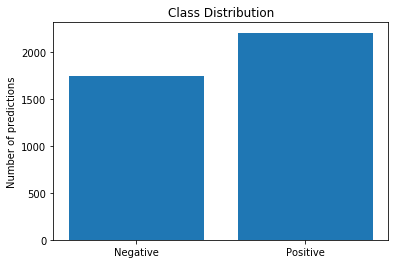

In [97]:
# Negative vs Positive
display_classes(y_raw_log)

In [98]:
# Confusion Matrix
confusion_matrix(y_raw_log, test_target)

0     1
0  1309   433
1   477  1728

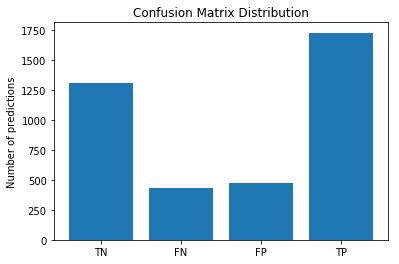

In [99]:
# visualize confusion matrix
display_conf(y_raw_log, test_target)

## Comparison

By observing the test scores for all four algorithms we can see that QDA's test score slightly edges out pocket's and logistic’s test scores, while clearly beating LDA's test scores. Therefore, I must say that QDA is the best algorithm for my data. <br>

There are a couple things I would like to note about the algorithms used. First, is that I may be able to achieve higher scores on both pocket and logistic regression with further parameter tuning. It is also important to note that the difference between QDA, pocket and logistic test scores is marginal, any of the three algorithms could be optimal. Secondly, LDA is clearly not the algorithm for my data. I believe this is due to the universal covariance matrix not generalizing well with my data. Lastly, it is interesting to see how close both pocket and logistic regression test scores are for my data even though the train score for pocket was rather poor. Maybe the poor train score for pocket can be explain by the variance in train scores due to single sample learning (online learning).

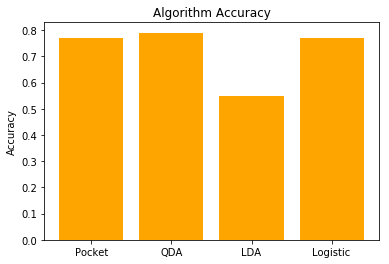

In [91]:
y = [pock_test_acc, qda_acc,lda_acc,log_test_acc]
names = ["Pocket", "QDA", "LDA", "Logistic"]
x = np.arange(4)

plt.bar(x,y,color="orange")
plt.xticks(x, names)
plt.title("Algorithm Accuracy")
plt.ylabel("Accuracy")
plt.show()

# V. Conclusions

All in all, I would say QDA performed the best but pocket and logistic regression, with further parameter tuning, could become optimal methods to use. If there is anything to extract from this, it is that LDA preformed the worst and by a significant margin. <br>

I did not face any significant challenge using this data. I started off using my brain signal data from assignment 0. Sadly, it proved to hard to adapt these simplistic classification models to my complex brain data. This is because the brain data operates as a 3d array, one classification sample is mapped to 200 brain data samples. This simply proved too challenging for the time I had. Therefore, I switched to my regression data and adapted it to fit the classification model, which turned out rather interesting!

# References

Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788, [Web Link](https://www.sciencedirect.com/science/article/pii/S0378778816308970?via%3Dihub).

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)